# Bank Marketing Campaign Analysis and Prediction Model

## Project Overview
This project analyzes a dataset from a Portuguese banking institution's direct marketing campaigns, with the goal of predicting whether a client will subscribe to a term deposit. The marketing campaigns were conducted via phone calls, with multiple contacts often required to determine if a client would subscribe ('yes') or not ('no') to the bank term deposit.

## Data Source
The dataset is sourced from the UCI Machine Learning Repository ([Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)) and contains records of marketing campaigns conducted between May 2008 and November 2010. The data was collected by S. Moro, P. Cortez and P. Rita in their research on bank marketing strategies.

### Dataset Characteristics
- Number of Instances: 41,188
- Number of Attributes: 20 input features + target variable
- Target Variable: 'y' (binary: 'yes', 'no')
- Task: Binary Classification

### Key Features Include:
1. Client Data:
   - Age, job, marital status, education
   - Whether they have credit in default
   - Housing and personal loans

2. Campaign Information:
   - Contact type and duration
   - Month and day of contact
   - Number of contacts performed
   - Previous campaign outcomes

3. Economic Context Attributes:
   - Employment variation rate
   - Consumer price index
   - Consumer confidence index
   - Euribor 3-month rate

## Project Goals
1. Develop a predictive model to identify potential term deposit subscribers
2. Analyze which factors most strongly influence successful subscriptions
3. Provide actionable insights for future marketing campaigns
4. Evaluate model performance using appropriate metrics

This analysis aims to help the bank optimize its marketing strategy by targeting clients who are more likely to subscribe to term deposits, thereby improving campaign efficiency and reducing unnecessary customer contacts.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# look at the data
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (41188, 21)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
n

In [5]:
# Identify variable types
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Variables:", len(categorical_vars))
print(list(categorical_vars))
print("\nNumerical Variables:", len(numerical_vars))
print(list(numerical_vars))

Categorical Variables: 11
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical Variables: 10
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [6]:
# Understand class distribution
target_dist = df['y'].value_counts()
print("Target Distribution:")
print(target_dist)
print("\nPercentages:")
print(target_dist / len(df) * 100)

Target Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Percentages:
y
no     88.734583
yes    11.265417
Name: count, dtype: float64


In [8]:
# Identify variable types
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Variables:", len(categorical_vars))
print(list(categorical_vars))
print("\nNumerical Variables:", len(numerical_vars))
print(list(numerical_vars))

Categorical Variables: 11
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Numerical Variables: 10
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### 1. Initial Data Overview
- Dataset contains 41,188 records with no missing values
- Imbalanced target variable: 88.7% 'no' vs 11.3% 'yes' for term deposit subscription
- Mix of categorical (11) and numerical (10) variables

In [9]:
# Function for categorical variables analysis
def analyze_categorical(df, column):
    # Distribution
    dist = df[column].value_counts()
    dist_pct = df[column].value_counts(normalize=True) * 100
    
    # Cross-tabulation with target
    ctab = pd.crosstab(df[column], df['y'], normalize='index') * 100
    
    print(f"\nAnalysis for {column}:")
    print("\nDistribution:")
    for val, count in dist.items():
        print(f"{val}: {count} ({dist_pct[val]:.1f}%)")
    
    print("\nSuccess Rate by Category:")
    print(ctab['yes'].sort_values(ascending=False))
    
    return dist, ctab

# Function for numerical variables analysis
def analyze_numerical(df, column):
    # Basic statistics
    stats_summary = df[column].describe()
    
    # Calculate statistics by target
    grouped_stats = df.groupby('y')[column].describe()
    
    print(f"\nAnalysis for {column}:")
    print("\nOverall Statistics:")
    print(stats_summary)
    print("\nStatistics by Target:")
    print(grouped_stats)
    
    return stats_summary, grouped_stats


In [10]:
# Demographics
# Client Demographics
analyze_numerical(df, 'age')

demographic_vars = ['job', 'marital', 'education']
for var in demographic_vars:
    print(f"\n=== Analysis of {var} ===")
    analyze_categorical(df, var)


Analysis for age:

Overall Statistics:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Statistics by Target:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
yes   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0

=== Analysis of job ===

Analysis for job:

Distribution:
admin.: 10422 (25.3%)
blue-collar: 9254 (22.5%)
technician: 6743 (16.4%)
services: 3969 (9.6%)
management: 2924 (7.1%)
retired: 1720 (4.2%)
entrepreneur: 1456 (3.5%)
self-employed: 1421 (3.5%)
housemaid: 1060 (2.6%)
unemployed: 1014 (2.5%)
student: 875 (2.1%)
unknown: 330 (0.8%)

Success Rate by Category:
job
student          31.428571
retired          25.232558
unemployed       14.201183
admin.           12.972558
manag

C:\Users\ROnik\AppData\Local\Temp\ipykernel_31040\1531254256.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\ROnik\AppData\Local\Temp\ipykernel_31040\1531254256.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


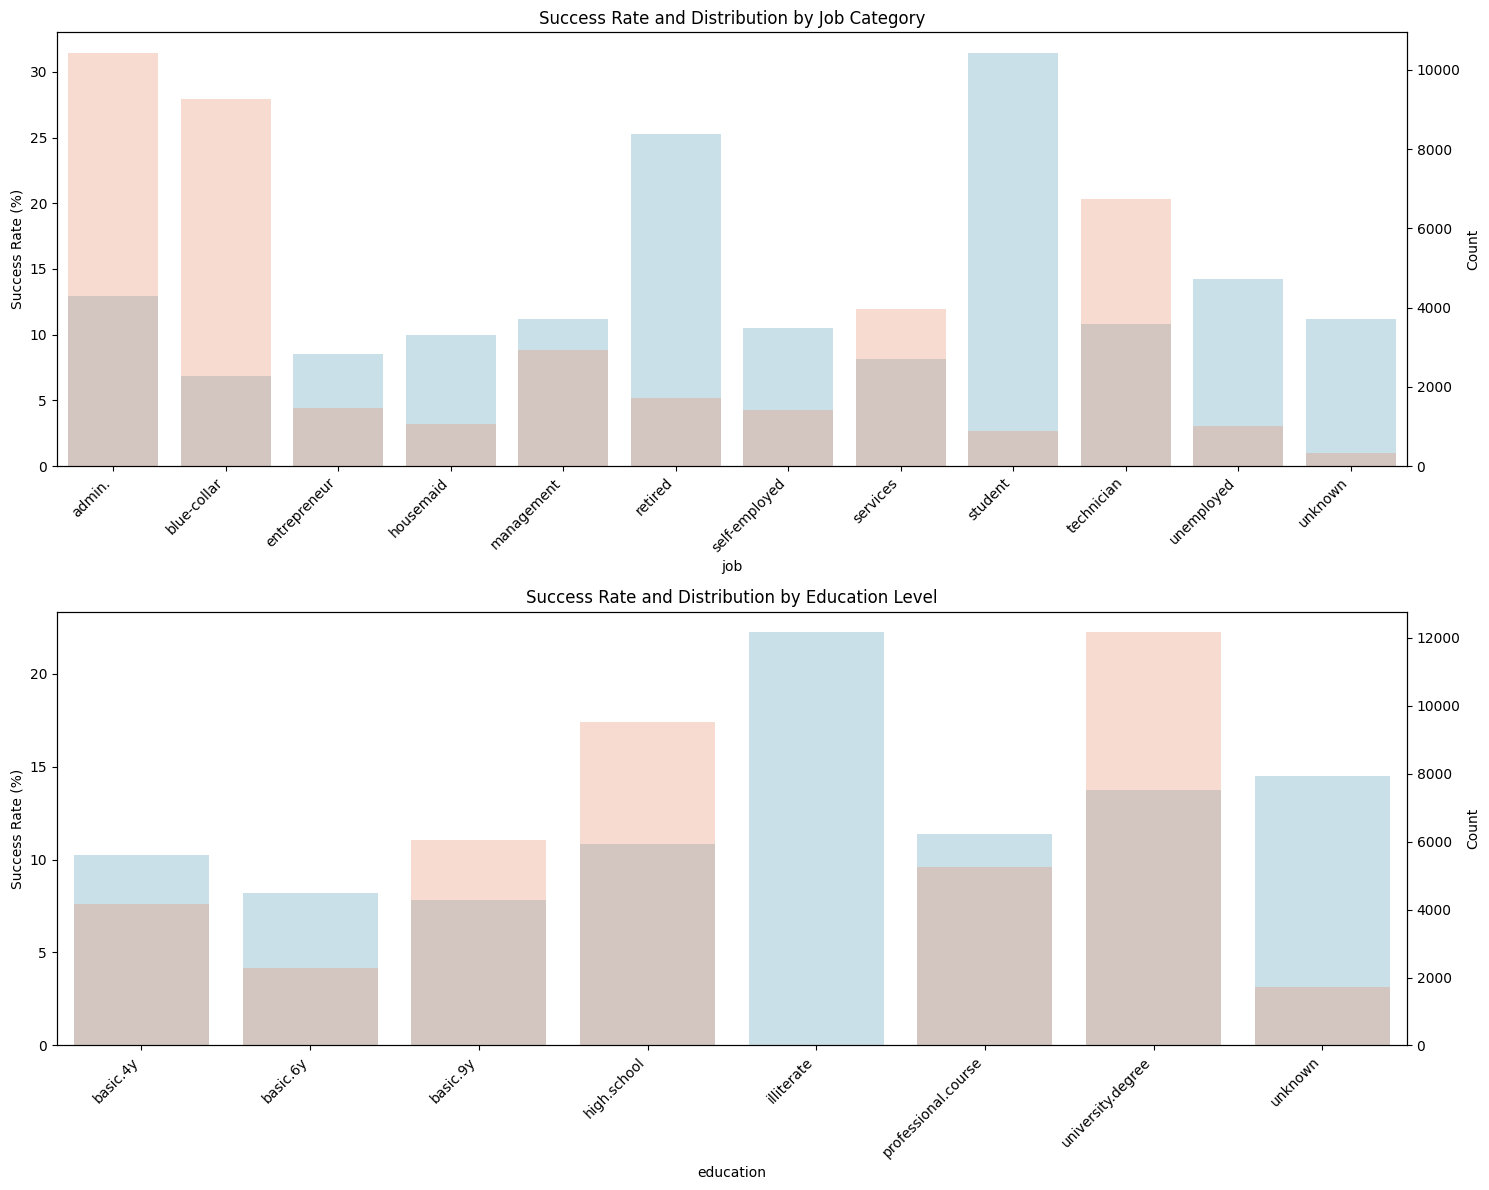

In [11]:
def plot_demographics(df):
    # Job analysis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Success rate by job
    job_success = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean() * 100)
    job_counts = df['job'].value_counts()
    
    # Create bar plot with two y-axes
    ax1_twin = ax1.twinx()
    
    # Plot success rates
    sns.barplot(x=job_success.index, y=job_success.values, ax=ax1, color='lightblue', alpha=0.7)
    ax1.set_ylabel('Success Rate (%)')
    
    # Plot counts on twin axis
    sns.barplot(x=job_counts.index, y=job_counts.values, ax=ax1_twin, color='coral', alpha=0.3)
    ax1_twin.set_ylabel('Count')
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title('Success Rate and Distribution by Job Category')
    
    # Education analysis
    edu_success = df.groupby('education')['y'].apply(lambda x: (x == 'yes').mean() * 100)
    edu_counts = df['education'].value_counts()
    
    # Create bar plot with two y-axes
    ax2_twin = ax2.twinx()
    
    # Plot success rates
    sns.barplot(x=edu_success.index, y=edu_success.values, ax=ax2, color='lightblue', alpha=0.7)
    ax2.set_ylabel('Success Rate (%)')
    
    # Plot counts on twin axis
    sns.barplot(x=edu_counts.index, y=edu_counts.values, ax=ax2_twin, color='coral', alpha=0.3)
    ax2_twin.set_ylabel('Count')
    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title('Success Rate and Distribution by Education Level')
    
    plt.tight_layout()
    plt.show()

plot_demographics(df)

### Demographic Variables Analysis (job, marital, education)
- **Job**: Strongest demographic predictor
  * Students (31.4%) and retired (25.2%) show highest success rates
  * Blue-collar workers have lowest success rate (6.9%)
  * Most common occupations: admin (25.3%) and blue-collar (22.5%)

- **Education**: Shows clear pattern
  * University degree holders (13.7% success) perform better than basic education
  * Note: Illiterate category (22.2%) may be misleading due to tiny sample size (18 cases)

- **Marital Status**: Moderate impact
  * Single individuals slightly more likely to subscribe (14.0%)
  * Married individuals (60.5% of sample) show lowest success rate (10.2%)


In [10]:
# Financial Indicators
financial_vars = ['default', 'housing', 'loan']
for var in financial_vars:
    print(f"\n=== Analysis of {var} ===")
    analyze_categorical(df, var)


=== Analysis of default ===

Analysis for default:

Distribution:
no: 32588 (79.1%)
unknown: 8597 (20.9%)
yes: 3 (0.0%)

Success Rate by Category:
default
no         12.878974
unknown     5.152960
yes         0.000000
Name: yes, dtype: float64

=== Analysis of housing ===

Analysis for housing:

Distribution:
yes: 21576 (52.4%)
no: 18622 (45.2%)
unknown: 990 (2.4%)

Success Rate by Category:
housing
yes        11.619392
no         10.879605
unknown    10.808081
Name: yes, dtype: float64

=== Analysis of loan ===

Analysis for loan:

Distribution:
no: 33950 (82.4%)
yes: 6248 (15.2%)
unknown: 990 (2.4%)

Success Rate by Category:
loan
no         11.340206
yes        10.931498
unknown    10.808081
Name: yes, dtype: float64


### Financial Status Variables (default, housing, loan)
- **Default Status**: Strong indicator
  * Non-defaulters (79.1% of sample) show higher success rate (12.9%)
  * Very few actual defaults in data (only 3 cases)

- **Housing and Loan**: Minimal impact
  * Housing and loan status show minor differences in success rates (<1% difference)
  * High proportion of 'unknown' responses might limit reliability

In [11]:
# Campaign-related
campaign_vars = ['contact', 'month', 'day_of_week', 'poutcome']
for var in campaign_vars:
    print(f"\n=== Analysis of {var} ===")
    analyze_categorical(df, var)


=== Analysis of contact ===

Analysis for contact:

Distribution:
cellular: 26144 (63.5%)
telephone: 15044 (36.5%)

Success Rate by Category:
contact
cellular     14.737607
telephone     5.231321
Name: yes, dtype: float64

=== Analysis of month ===

Analysis for month:

Distribution:
may: 13769 (33.4%)
jul: 7174 (17.4%)
aug: 6178 (15.0%)
jun: 5318 (12.9%)
nov: 4101 (10.0%)
apr: 2632 (6.4%)
oct: 718 (1.7%)
sep: 570 (1.4%)
mar: 546 (1.3%)
dec: 182 (0.4%)

Success Rate by Category:
month
mar    50.549451
dec    48.901099
sep    44.912281
oct    43.871866
apr    20.478723
aug    10.602137
jun    10.511470
nov    10.143867
jul     9.046557
may     6.434745
Name: yes, dtype: float64

=== Analysis of day_of_week ===

Analysis for day_of_week:

Distribution:
thu: 8623 (20.9%)
mon: 8514 (20.7%)
wed: 8134 (19.7%)
tue: 8090 (19.6%)
fri: 7827 (19.0%)

Success Rate by Category:
day_of_week
thu    12.118752
tue    11.779975
wed    11.667076
fri    10.808739
mon     9.948320
Name: yes, dtype: float6

In [ ]:
# Campaign Statistics
campaign_nums = ['duration', 'campaign', 'pdays', 'previous']
for var in campaign_nums:
    print(f"\n=== Analysis of {var} ===")
    analyze_numerical(df, var)


Analysis for age:

Overall Statistics:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Statistics by Target:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
yes   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0

=== Analysis of duration ===

Analysis for duration:

Overall Statistics:
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Statistics by Target:
       count        mean         std   min    25%    50%     75%     max
y                                                                       
no   36548.0  220.844807  207.09

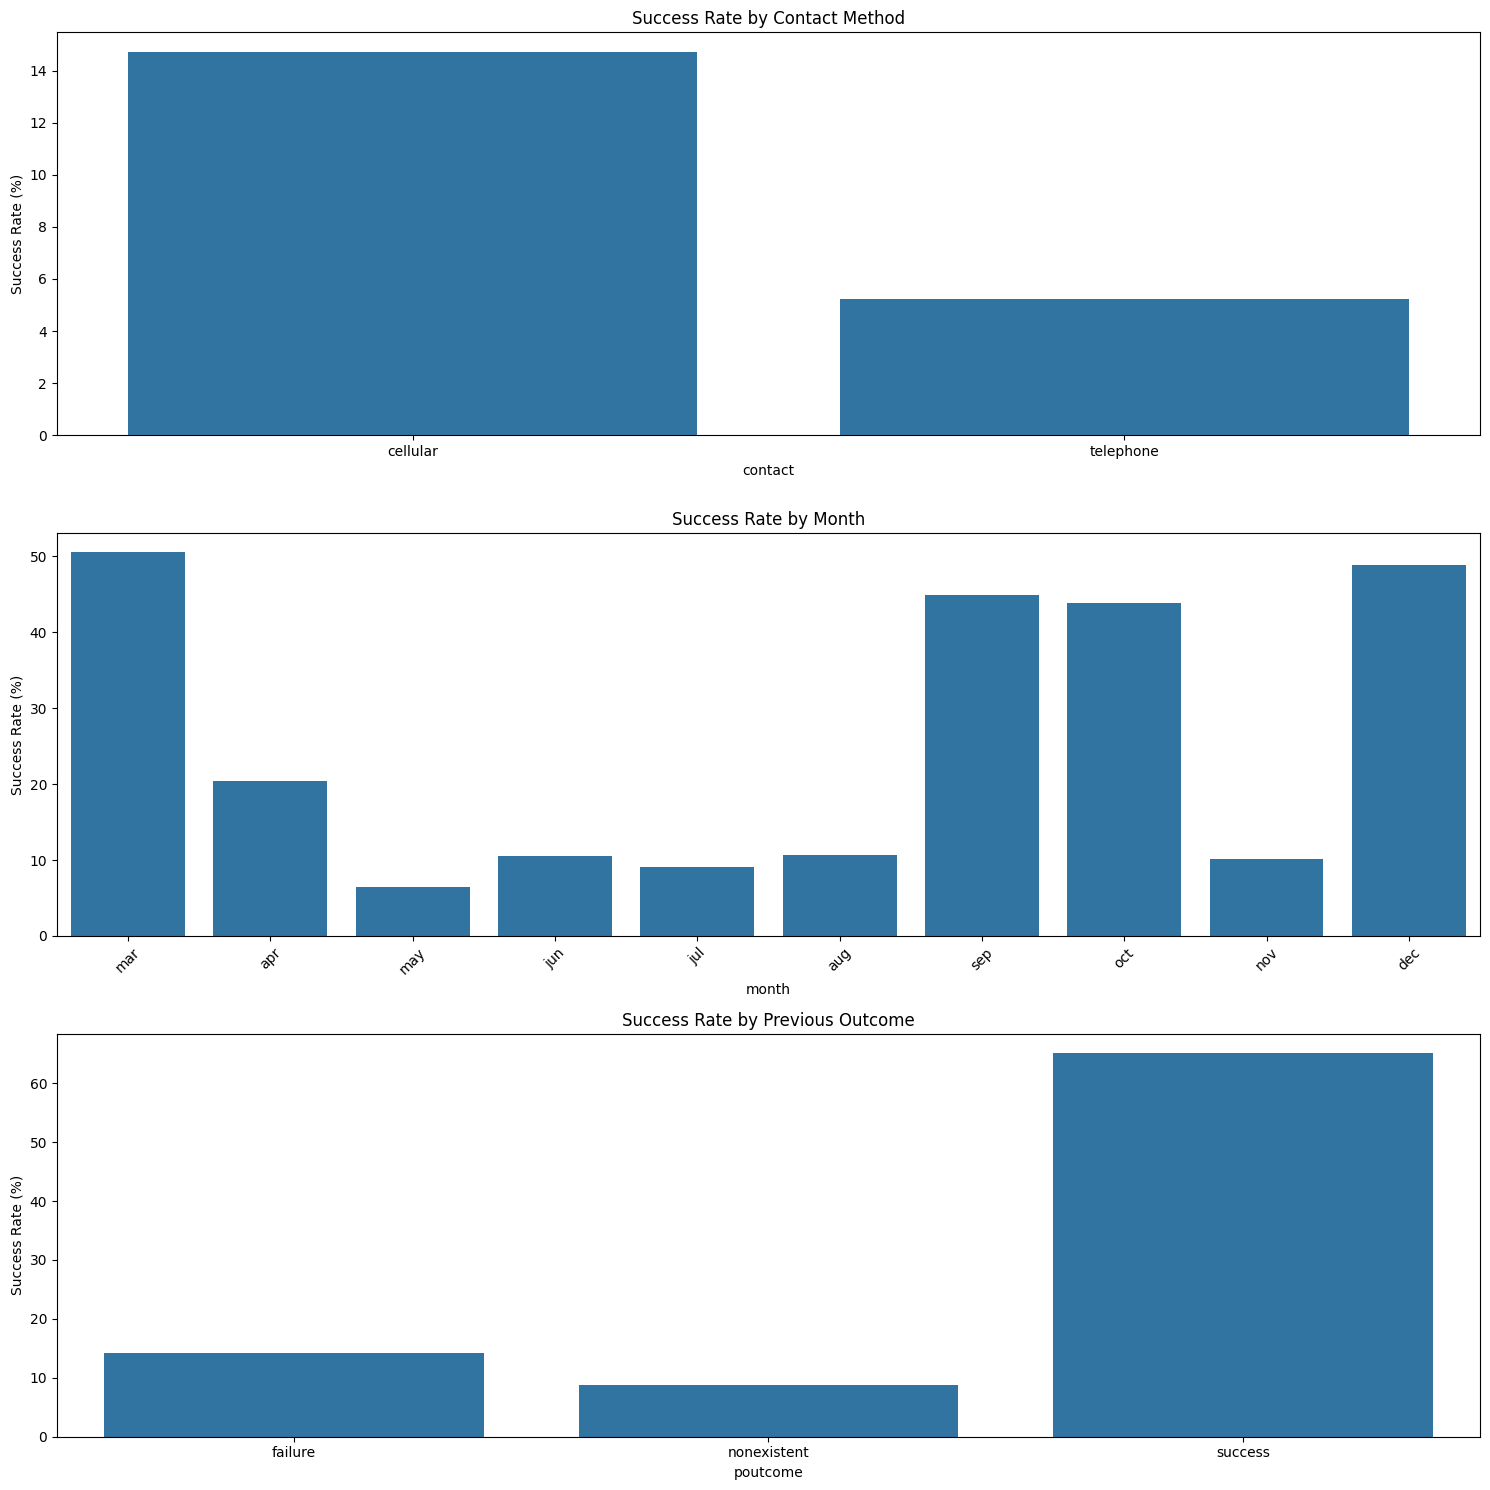

In [16]:
def plot_campaign_metrics(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))
    
    # Contact method comparison
    contact_success = df.groupby('contact')['y'].apply(lambda x: (x == 'yes').mean() * 100)
    sns.barplot(x=contact_success.index, y=contact_success.values, ax=ax1)
    ax1.set_title('Success Rate by Contact Method')
    ax1.set_ylabel('Success Rate (%)')
    
    # Monthly patterns
    month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    month_success = df.groupby('month')['y'].apply(lambda x: (x == 'yes').mean() * 100)
    sns.barplot(x=month_success.index, y=month_success.values, ax=ax2, order=month_order)
    ax2.set_title('Success Rate by Month')
    ax2.set_ylabel('Success Rate (%)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Previous outcome impact
    poutcome_success = df.groupby('poutcome')['y'].apply(lambda x: (x == 'yes').mean() * 100)
    sns.barplot(x=poutcome_success.index, y=poutcome_success.values, ax=ax3)
    ax3.set_title('Success Rate by Previous Outcome')
    ax3.set_ylabel('Success Rate (%)')
    
    plt.tight_layout()
    plt.show()

plot_campaign_metrics(df)

C:\Users\ROnik\AppData\Local\Temp\ipykernel_27700\3120137647.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['campaign'] <= 10], x='y', y='campaign',
C:\Users\ROnik\AppData\Local\Temp\ipykernel_27700\3120137647.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_success = df_temp.groupby('contact_history')['y'].apply(


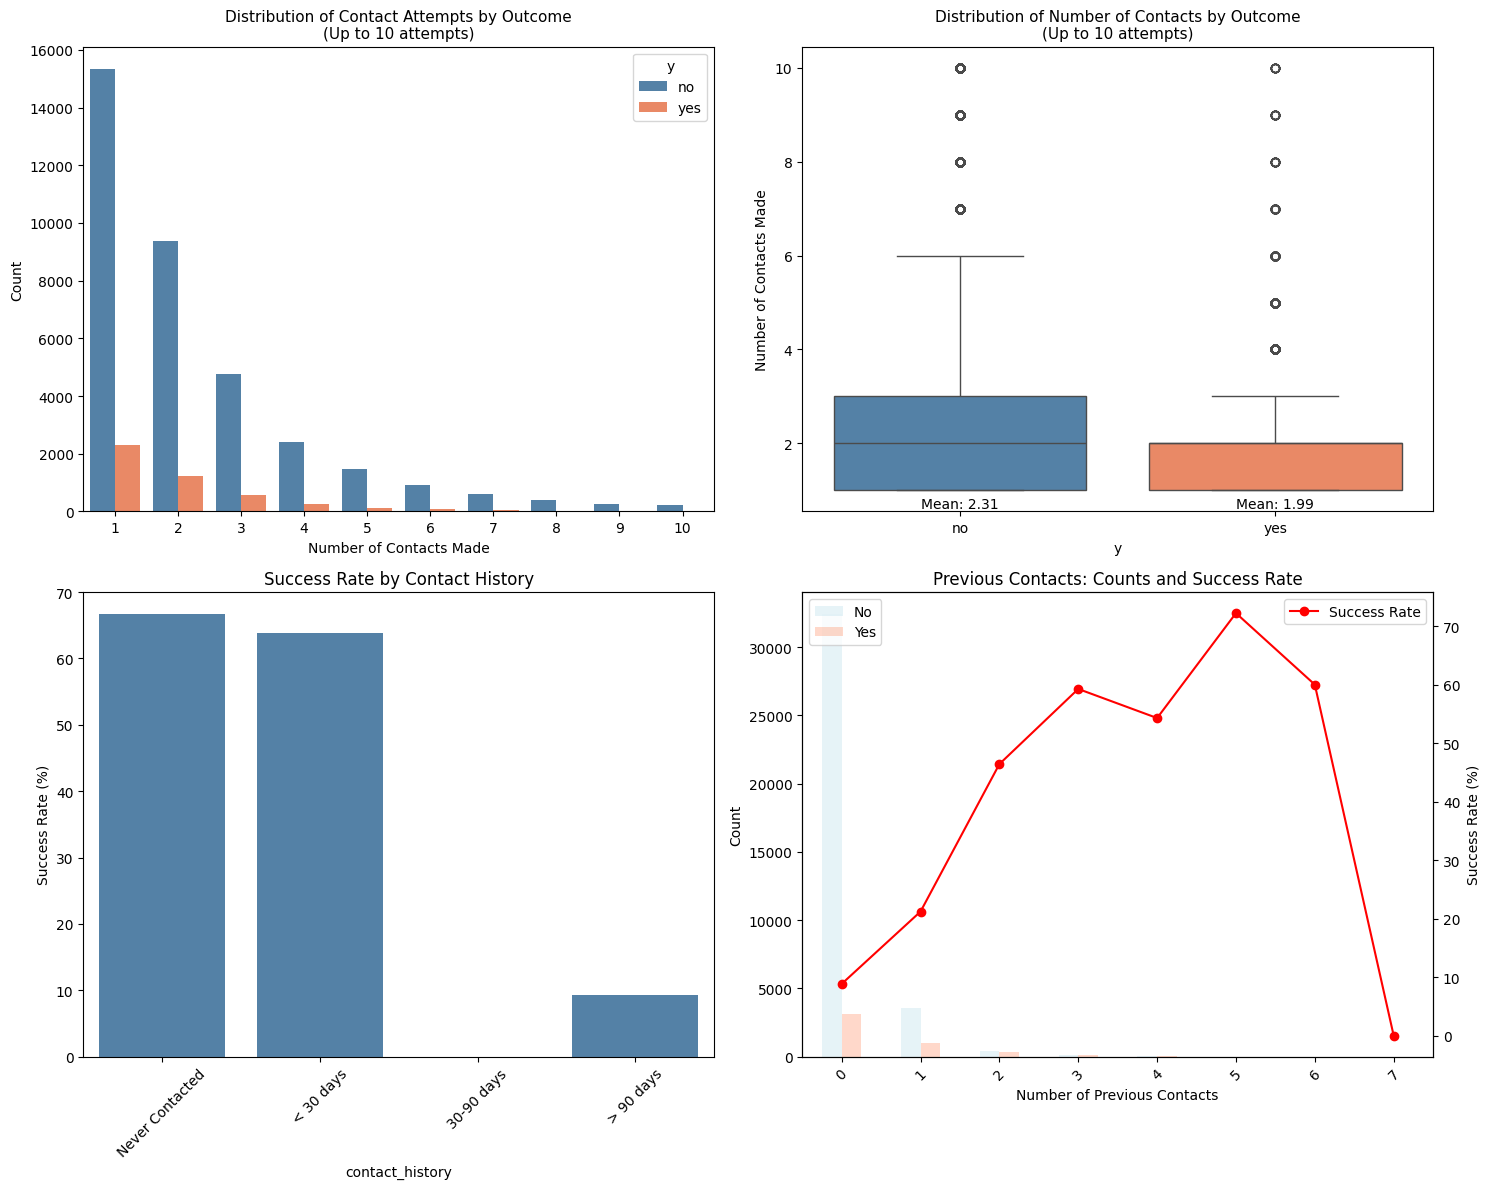

In [27]:
def plot_campaign_contact_patterns(df):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Top left: Clean count plot without percentages
    sns.countplot(data=df[df['campaign'] <= 10], x='campaign', hue='y', 
                 palette=['steelblue', 'coral'], ax=ax1)
    ax1.set_title('Distribution of Contact Attempts by Outcome\n(Up to 10 attempts)', fontsize=11)
    ax1.set_xlabel('Number of Contacts Made')
    ax1.set_ylabel('Count')
    
    # Top right: Simple boxplot with mean values
    sns.boxplot(data=df[df['campaign'] <= 10], x='y', y='campaign', 
                palette=['steelblue', 'coral'], ax=ax2)
    ax2.set_title('Distribution of Number of Contacts by Outcome\n(Up to 10 attempts)', fontsize=11)
    ax2.set_ylabel('Number of Contacts Made')
    
    # Add mean values
    means = df[df['campaign'] <= 10].groupby('y')['campaign'].mean()
    for i, mean in enumerate(means):
        ax2.text(i, ax2.get_ylim()[0], f'Mean: {mean:.2f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Previous contacts analysis
    df_temp = df.copy()
    df_temp['contact_history'] = pd.cut(df_temp['pdays'], 
                                        bins=[-np.inf, 0, 30, 90, np.inf],
                                        labels=['Never Contacted', '< 30 days', '30-90 days', '> 90 days'])

    contact_success = df_temp.groupby('contact_history')['y'].apply(
        lambda x: (x == 'yes').mean() * 100)
    sns.barplot(x=contact_success.index, y=contact_success.values, 
                color='steelblue', ax=ax3)
    ax3.set_title('Success Rate by Contact History')
    ax3.set_ylabel('Success Rate (%)')
    ax3.tick_params(axis='x', rotation=45)

    success_by_prev = df.groupby('previous')['y'].value_counts().unstack(fill_value=0)
    success_rate = (success_by_prev['yes'] / (success_by_prev['yes'] + success_by_prev['no']) * 100)

    ax4_twin = ax4.twinx()
    success_by_prev.plot(kind='bar', ax=ax4, alpha=0.3, 
                         color=['lightblue', 'coral'])
    success_rate.plot(color='red', marker='o', ax=ax4_twin)

    ax4.set_title('Previous Contacts: Counts and Success Rate')
    ax4.set_xlabel('Number of Previous Contacts')
    ax4.set_ylabel('Count')
    ax4_twin.set_ylabel('Success Rate (%)')
    ax4.tick_params(axis='x', rotation=45)

    # **Fix duplicate legend by combining & setting manually**
    ax4_legend = ax4.legend(['No', 'Yes'], loc='upper left')
    ax4_twin_legend = ax4_twin.legend(['Success Rate'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

plot_campaign_contact_patterns(df)

### Campaign Execution Variables (contact, month, poutcome)
- **Contact Method**: Highly significant
  * Cellular contact (63.5% of contacts) nearly triples success rate (14.7% vs 5.2%)
  
- **Monthly Patterns**: Strong seasonal effect
  * March-April period shows dramatically higher success (>40%)
  * May-July period shows lowest success rates (<10%)
  * Note: Uneven distribution across months (33.4% in May)

- **Previous Outcome**: Strongest predictor
  * Previous success leads to 65.1% success rate
  * Previous failure (14.2%) still better than no history (8.8%)

### Campaign Specific Metrics
- **Duration**: Strong predictor but not useful for prediction
  * Successful calls significantly longer (553s vs 221s)
  * Should be excluded from predictive modeling as it's only known after the call

- **Campaign Contact Pattern**:
  * Successful subscriptions required fewer attempts (mean 2.05 vs 2.63)
  * Previous contacts (pdays, previous) show some predictive value

In [ ]:
# Economic Indicators
economic_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for var in economic_vars:
    print(f"\n=== Analysis of {var} ===")
    analyze_numerical(df, var)


=== Analysis of emp.var.rate ===

Analysis for emp.var.rate:

Overall Statistics:
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Statistics by Target:
       count      mean       std  min  25%  50%  75%  max
y                                                        
no   36548.0  0.248875  1.482932 -3.4 -1.8  1.1  1.4  1.4
yes   4640.0 -1.233448  1.623626 -3.4 -1.8 -1.8 -0.1  1.4

=== Analysis of cons.price.idx ===

Analysis for cons.price.idx:

Overall Statistics:
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Statistics by Target:
       count       mean       std     min     25%     50%     75%     max
y                                                     

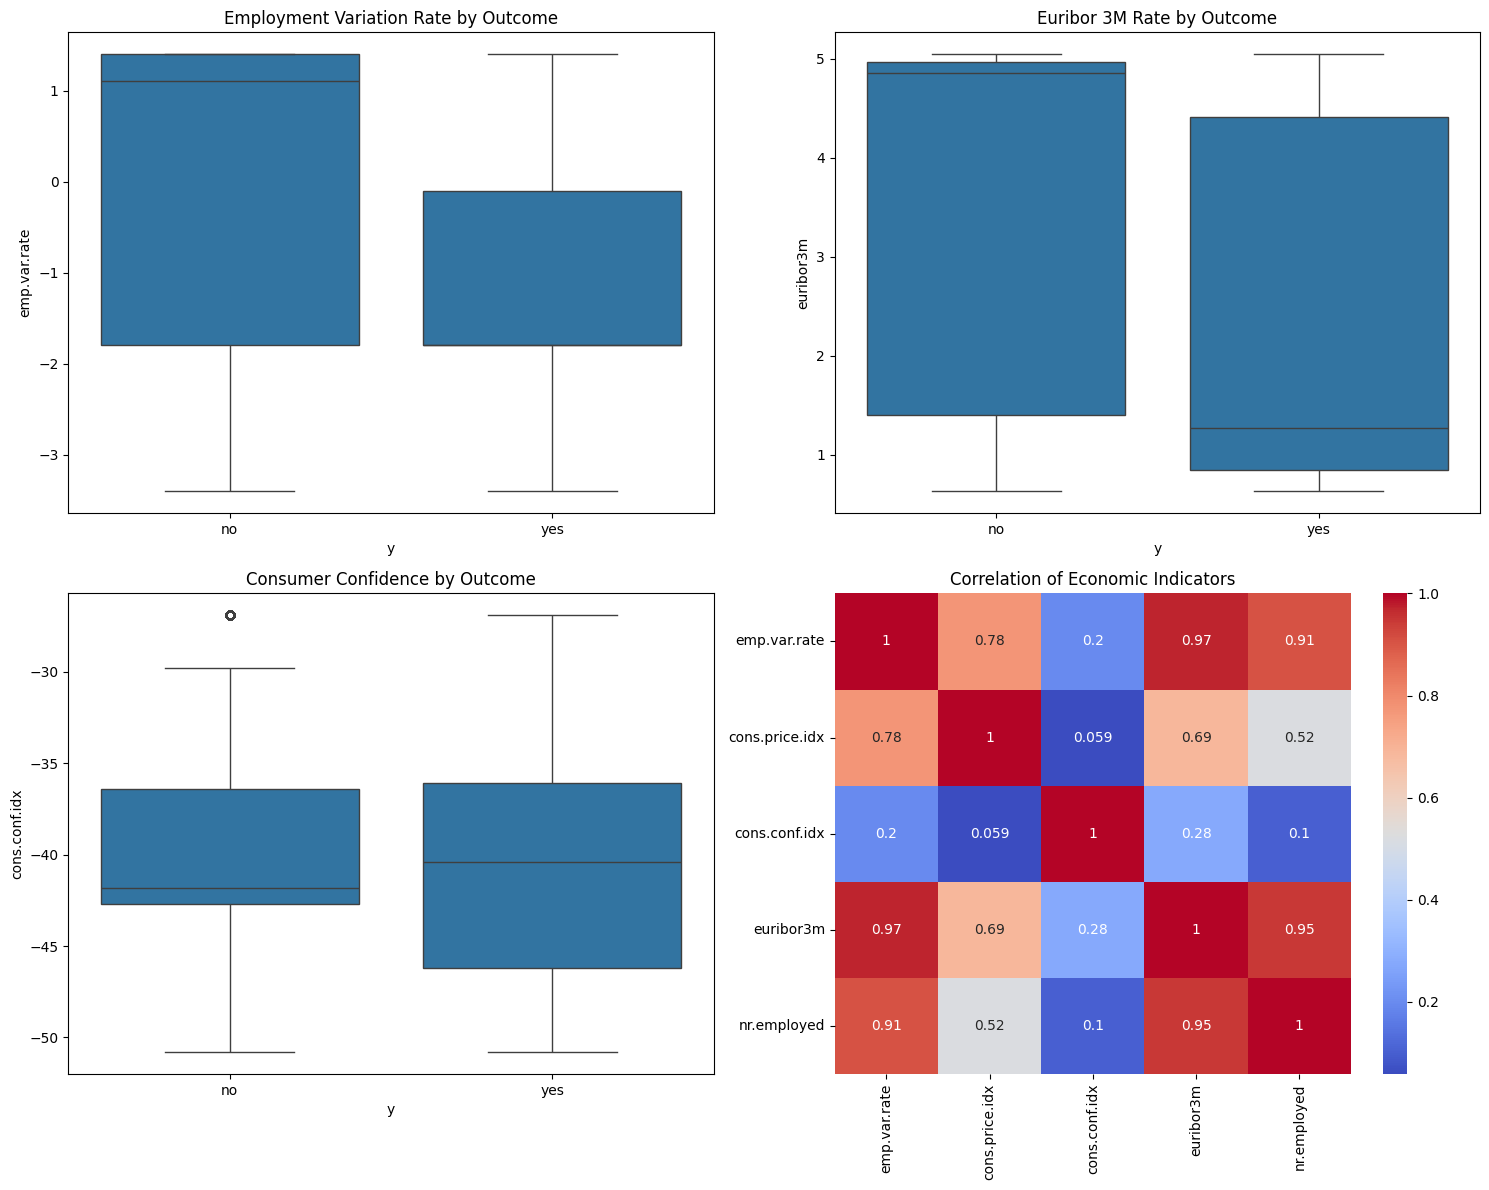

In [17]:
def plot_economic_indicators(df):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Employment variation rate
    sns.boxplot(x='y', y='emp.var.rate', data=df, ax=ax1)
    ax1.set_title('Employment Variation Rate by Outcome')
    
    # Interest rate
    sns.boxplot(x='y', y='euribor3m', data=df, ax=ax2)
    ax2.set_title('Euribor 3M Rate by Outcome')
    
    # Consumer confidence
    sns.boxplot(x='y', y='cons.conf.idx', data=df, ax=ax3)
    ax3.set_title('Consumer Confidence by Outcome')
    
    # Correlation heatmap of economic indicators
    economic_vars = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    sns.heatmap(df[economic_vars].corr(), annot=True, cmap='coolwarm', ax=ax4)
    ax4.set_title('Correlation of Economic Indicators')
    
    plt.tight_layout()
    plt.show()

plot_economic_indicators(df)

### Economic Indicators Analysis
- **Employment Variation Rate**: Clear difference
  * Successful cases associated with lower employment variation (-1.23 vs 0.25)
  
- **Interest Rate (euribor3m)**: Strong indicator
  * Successful subscriptions associated with lower rates (2.12 vs 3.81)
  
- **Other Economic Indicators**:
  * Consumer confidence and price indices show minor differences
  * Number of employees shows slight variation between groups

- **Correlations Between Indicators**:
  * Strong correlations exist between employment variation rate, euribor3m rate, and number of employees (>0.90)
  * This high multicollinearity suggests we might not need all these variables in our predictive model
  * Consumer confidence index appears relatively independent (low correlations with other indicators)

## Data Splitting Strategy & Model Selection

### Data Organization
- **Train-Test Split (80-20)**:
 * 80% training data for model development
 * 20% held-out test data for final evaluation
 * Stratified split to maintain class distribution (11.27% positive cases)

### Cross-Validation Approach
- **5-fold Stratified CV on Training Data**:
 * More reliable performance estimates given class imbalance
 * Each fold maintains original class distribution
 * Helps assess model stability across different data splits

### Baseline Models

1. **Random Forest**
  - Advantages for our case:
    * Handles non-linear relationships in economic indicators
    * Built-in feature importance for business insights
    * Manages class imbalance via class_weight parameter
    * Robust to outliers and correlated features

2. **XGBoost**
  - Advantages for our case:
    * Strong performance on imbalanced data
    * Handles complex feature interactions
    * Scale_pos_weight parameter for class imbalance
    * Gradient boosting can capture subtle patterns

### Model Configuration
- **Random Forest Base Configuration**:
 * class_weight='balanced' for imbalanced data
 * n_jobs=-1 for parallel processing
 * Other parameters at default for baseline

- **XGBoost Base Configuration**:
 * scale_pos_weight adjusted for class imbalance
 * Other parameters at default for baseline

### Evaluation Metrics
- **Primary**: Average Precision (AP)
 * Suitable for imbalanced classification
 * Focuses on positive class performance
- **Secondary**: ROC-AUC
 * Overall classification performance
 * Class imbalance resistant

In [12]:
def preprocess_bank_data(df, exclude_duration=True):
    """
    Preprocess the bank marketing dataset with explicit type conversion.
    """
    data = df.copy()
    
    # 1. Binary categorical variables (yes/no)
    binary_vars = ['default', 'housing', 'loan']
    for var in binary_vars:
        data[var] = data[var].map({'yes': 1, 'no': 0, 'unknown': -1}).astype('int8')
    
    # 2. Month and day cyclical features
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    data['month'] = data['month'].map(month_map)
    data['month_sin'] = np.sin(2 * np.pi * data['month']/12).astype('float32')
    data['month_cos'] = np.cos(2 * np.pi * data['month']/12).astype('float32')
    
    day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
    data['day_of_week'] = data['day_of_week'].map(day_map)
    data['day_sin'] = np.sin(2 * np.pi * data['day_of_week']/5).astype('float32')
    data['day_cos'] = np.cos(2 * np.pi * data['day_of_week']/5).astype('float32')
    
    # 3. Handle pdays and create contact history bins
    data['pdays'] = data['pdays'].replace(999, -1).astype('int16')
    
    # Create contact history bins and convert to dummy variables
    data['contact_history'] = pd.cut(
        data['pdays'], 
        bins=[-np.inf, 0, 30, 90, np.inf],
        labels=['Never_Contacted', 'Last_30d', '30_90d', 'Over_90d']
    )
    contact_history_dummies = pd.get_dummies(
        data['contact_history'], 
        prefix='contact_history'
    )
    data = pd.concat([data, contact_history_dummies], axis=1)
    data.drop('contact_history', axis=1, inplace=True)
    
    # 4. One-hot encode categorical variables
    categorical_vars = ['job', 'marital', 'education', 'contact', 'poutcome']
    data = pd.get_dummies(data, columns=categorical_vars, prefix=categorical_vars)
    
    # 5. Ensure numeric features are float32
    numeric_features = ['age', 'campaign', 'previous', 'emp.var.rate', 
                       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    if not exclude_duration:
        numeric_features.append('duration')
    
    for col in numeric_features:
        data[col] = data[col].astype('float32')
    
    # 6. Prepare final feature matrix
    columns_to_drop = ['month', 'day_of_week', 'y']
    if exclude_duration:
        columns_to_drop.append('duration')
    
    X = data.drop(columns_to_drop, axis=1)
    y = (data['y'] == 'yes').astype('int8')  # Explicit binary conversion
    
    # Final check to ensure all columns are numeric
    for col in X.columns:
        if X[col].dtype == 'object':
            print(f"Warning: Column {col} is still object type")
        if X[col].dtype == 'category':
            print(f"Warning: Column {col} is still category type")
    
    return X, y, X.columns.tolist()

# Apply preprocessing
X, y, feature_names = preprocess_bank_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print basic information about the preprocessed dataset
print("\nPreprocessed Dataset Shape:", X.shape)
print("\nFeature Names:", feature_names)
print("\nClass Distribution:")
print(pd.Series(y).value_counts(normalize=True))

# Print training and test set shapes
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Preprocessed Dataset Shape: (41188, 49)

Feature Names: ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'contact_history_Never_Contacted', 'contact_history_Last_30d', 'contact_history_30_90d', 'contact_history_Over_90d', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

Class Distribution:
y
0    0.887346
1   

In [15]:
# import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Base models with CV
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42),
    'XGBoost': xgb.XGBClassifier(
        scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
        random_state=42
    )
}

# Create stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# CV scores
for name, model in models.items():
    cv_scores = cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=skf,
        scoring='average_precision'
    )
    print(f"\n{name}:")
    print(f"Average Precision (CV): {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")


Random Forest:
Average Precision (CV): 0.409 (+/- 0.024)

XGBoost:
Average Precision (CV): 0.420 (+/- 0.020)


## Baseline Model Results

### Cross-Validation Performance

1. **Random Forest**
  - Average Precision: 0.409 (±0.024)
  * Relatively stable performance (std: 0.012)
  * Base configuration shows decent discrimination

2. **XGBoost**
  - Average Precision: 0.420 (±0.020)
  * Slightly better performance than RF
  * More stable across folds (lower std)
  * Shows promise for further tuning

### Key Observations
- Both models achieve similar baseline performance
- Small performance gap suggests room for improvement
- Standard deviations indicate consistent behavior across folds
- XGBoost's slight edge aligns with its reputation for strong performance on tabular data

### Next Steps
1. **Hyperparameter Tuning**
  - Grid search key parameters for both models
  - Focus on parameters that affect model complexity

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Store best parameters
best_params = {}
best_scores = {}

# RF parameters - targeting key areas for improvement
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  # Added to better handle class imbalance
    'class_weight': ['balanced']
}

# XGB parameters - focusing on overfitting prevention
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],  # For robustness
    'colsample_bytree': [0.8, 1.0],  # Feature sampling
    'scale_pos_weight': [len(y_train[y_train==0])/len(y_train[y_train==1])]
}

# Create stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
for name, (model, params) in {'rf': (RandomForestClassifier(random_state=42), rf_params), 
                             'xgb': (xgb.XGBClassifier(random_state=42), xgb_params)}.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        model, 
        params, 
        scoring='average_precision',
        cv=skf,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    best_params[name] = grid.best_params_
    best_scores[name] = grid.best_score_
    print(f"Best params:", grid.best_params_)
    print(f"Best Average Precision: {grid.best_score_:.3f}")

# Print improvement over baseline
print("\nImprovement Analysis:")
print(f"RF: {(best_scores['rf'] - 0.409) / 0.409:.1%} improvement")
print(f"XGB: {(best_scores['xgb'] - 0.420) / 0.420:.1%} improvement")


Tuning rf...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Average Precision: 0.466

Tuning xgb...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 7.876616379310345, 'subsample': 0.8}
Best Average Precision: 0.467

Improvement Analysis:
RF: 13.9% improvement
XGB: 11.1% improvement



Evaluating RF (tuned)...


Average Precision: 0.493
ROC-AUC: 0.815
F1 Score: 0.514

Business Metrics:
Missed Opportunities (FN): 339 potential customers
Unnecessary Calls (FP): 773 contacts
Success Rate: 63.47% of potential subscribers identified
Efficiency Rate: 43.25% of calls resulted in subscription

Top 10 Most Important Features:
                            feature  importance
10                        euribor3m    0.172679
11                      nr.employed    0.171000
7                      emp.var.rate    0.127277
9                     cons.conf.idx    0.059211
8                    cons.price.idx    0.050170
5                             pdays    0.042790
12                        month_sin    0.035584
17         contact_history_Last_30d    0.035103
0                               age    0.032967
16  contact_history_Never_Contacted    0.031880

Evaluating XGB (tuned)...
Average Precision: 0.482
ROC-AUC: 0.814
F1 Score: 0.482

Business Metrics:
Missed Opportunities (FN): 316 potential customers
Unneces

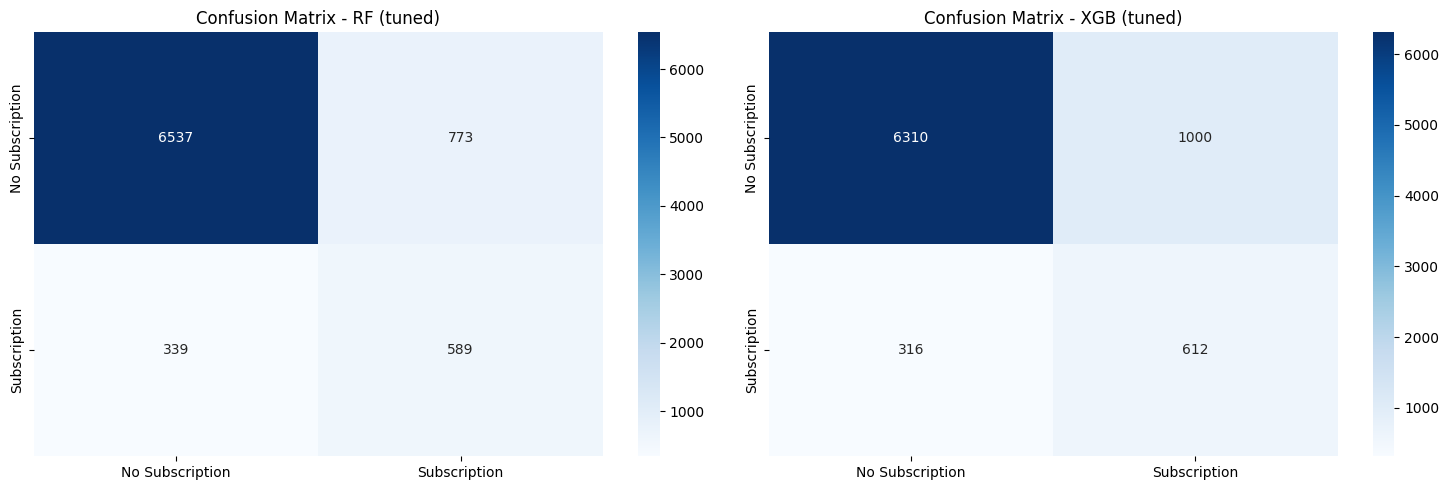

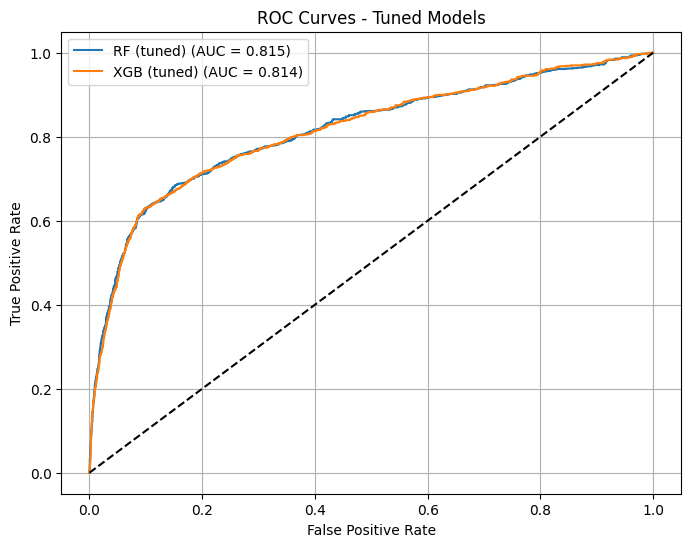

In [17]:
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, roc_curve, auc, f1_score

# Create final tuned models
models_tuned = {
    'RF (tuned)': RandomForestClassifier(
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=10,
        n_estimators=300,
        random_state=42
    ),
    'XGB (tuned)': xgb.XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.05,
        max_depth=3,
        n_estimators=300,
        scale_pos_weight=7.876616379310345,
        subsample=0.8,
        random_state=42
    )
}

# Evaluate final models
for name, model in models_tuned.items():
    print(f"\nEvaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    avg_prec = average_precision_score(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)  # Added F1 score
    
    # Calculate business metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    success_rate = tp/(tp+fn)  # Recall/Sensitivity
    efficiency_rate = tp/(tp+fp)  # Precision
    
    print(f"Average Precision: {avg_prec:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print(f"F1 Score: {f1:.3f}")  # Print F1 score
    print("\nBusiness Metrics:")
    print(f"Missed Opportunities (FN): {fn} potential customers")
    print(f"Unnecessary Calls (FP): {fp} contacts")
    print(f"Success Rate: {success_rate:.2%} of potential subscribers identified")
    print(f"Efficiency Rate: {efficiency_rate:.2%} of calls resulted in subscription")
    
    # For Random Forest, show feature importance
    if 'RF' in name:
        importances = model.feature_importances_
        feat_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        print("\nTop 10 Most Important Features:")
        print(feat_imp.head(10))

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for idx, (name, model) in enumerate(models_tuned.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Subscription', 'Subscription'],
                yticklabels=['No Subscription', 'Subscription'],
                ax=[ax1, ax2][idx])
    [ax1, ax2][idx].set_title(f'Confusion Matrix - {name}')
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models_tuned.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Tuned Models')
plt.legend()
plt.grid(True)
plt.show()

## Final Model Performance Analysis

### Technical Metrics Comparison
| Model | Avg Precision | ROC-AUC | F1 Score |
|-------|---------------|----------|-----------|
| RF    | 0.493         | 0.815    | 0.514    |
| XGB   | 0.482         | 0.814    | 0.482    |

### Business Metrics Comparison
| Model | Success Rate | Efficiency Rate | Missed Opportunities | Unnecessary Calls |
|-------|--------------|-----------------|---------------------|------------------|
| RF    | 63.47%       | 43.25%         | 339                 | 773             |
| XGB   | 65.95%       | 37.97%         | 316                 | 1000            |

### Trade-off Analysis
- Random Forest shows better balanced performance:
  * Higher F1 score (0.514 vs 0.482)
  * Better Average Precision (0.493 vs 0.482)
  * More efficient use of resources (227 fewer unnecessary calls)
  
- XGBoost shows more aggressive targeting:
  * Higher success rate (2.48% better)
  * Fewer missed opportunities (23 fewer)
  * But requires 29.4% more unnecessary calls

### Feature Importance (RF)
Key drivers of subscription likelihood:
1. Economic Environment (47.1% combined importance):
   - euribor3m (17.3%)
   - nr.employed (17.1%)
   - emp.var.rate (12.7%)
2. Market Indicators (11% combined):
   - cons.conf.idx (5.9%)
   - cons.price.idx (5.0%)
3. Campaign Execution (11.4% combined):
   - pdays (4.3%)
   - month_sin (3.6%)
   - contact_history features (3.5%)

### Final Recommendation
Strongly recommend the **Random Forest model** because:
1. Best overall technical performance (higher F1 and AP scores)
2. More efficient resource utilization
3. Provides interpretable feature importance
4. Better balanced metrics across all dimensions

The slight sacrifice in success rate (2.48%) is justified by:
- 29.4% reduction in unnecessary calls
- Higher precision in identifying likely subscribers
- Better overall balance of precision and recall (F1 score)

In [18]:
# After running previous evaluation code...

print("\nThreshold Analysis for RF Model:")
print("--------------------------------")
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Get probability predictions once
rf_proba = models_tuned['RF (tuned)'].predict_proba(X_test)[:, 1]

for threshold in thresholds:
    # Make predictions with current threshold
    y_pred_adjusted = (rf_proba >= threshold).astype(int)
    
    # Calculate all metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()
    success_rate = tp/(tp+fn)  # Recall
    efficiency_rate = tp/(tp+fp)  # Precision
    f1 = f1_score(y_test, y_pred_adjusted)
    
    print(f"\nThreshold: {threshold:.2f}")
    print("-----------------")
    print(f"Success Rate: {success_rate:.2%}")
    print(f"Efficiency Rate: {efficiency_rate:.2%}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Missed Opportunities (FN): {fn}")
    print(f"Unnecessary Calls (FP): {fp}")
    print(f"Total Calls Made: {fp + tp}")
    print(f"Successful Calls: {tp}")


Threshold Analysis for RF Model:
--------------------------------

Threshold: 0.20
-----------------
Success Rate: 96.01%
Efficiency Rate: 12.86%
F1 Score: 0.227
Missed Opportunities (FN): 37
Unnecessary Calls (FP): 6037
Total Calls Made: 6928
Successful Calls: 891

Threshold: 0.30
-----------------
Success Rate: 86.10%
Efficiency Rate: 18.05%
F1 Score: 0.298
Missed Opportunities (FN): 129
Unnecessary Calls (FP): 3628
Total Calls Made: 4427
Successful Calls: 799

Threshold: 0.40
-----------------
Success Rate: 70.37%
Efficiency Rate: 32.36%
F1 Score: 0.443
Missed Opportunities (FN): 275
Unnecessary Calls (FP): 1365
Total Calls Made: 2018
Successful Calls: 653

Threshold: 0.50
-----------------
Success Rate: 63.47%
Efficiency Rate: 43.25%
F1 Score: 0.514
Missed Opportunities (FN): 339
Unnecessary Calls (FP): 773
Total Calls Made: 1362
Successful Calls: 589

Threshold: 0.60
-----------------
Success Rate: 60.78%
Efficiency Rate: 46.92%
F1 Score: 0.530
Missed Opportunities (FN): 364
Unne


Threshold Analysis for RF Model:
--------------------------------

Threshold: 0.20
-----------------
Success Rate: 96.01%
Efficiency Rate: 12.86%
F1 Score: 0.227


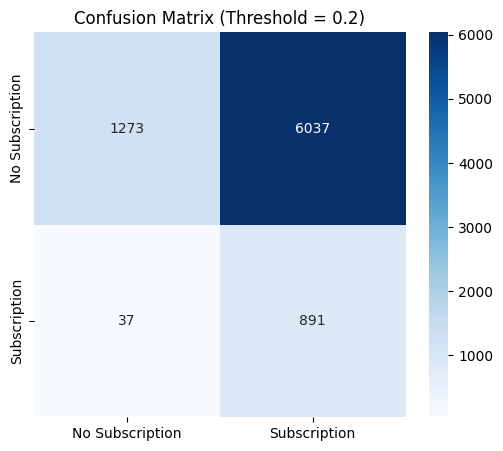


Threshold: 0.30
-----------------
Success Rate: 86.10%
Efficiency Rate: 18.05%
F1 Score: 0.298


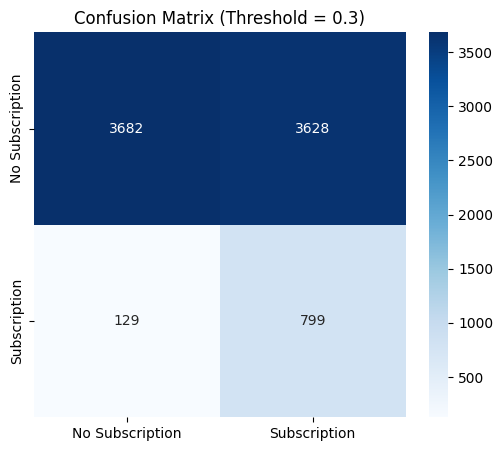


Threshold: 0.40
-----------------
Success Rate: 70.37%
Efficiency Rate: 32.36%
F1 Score: 0.443


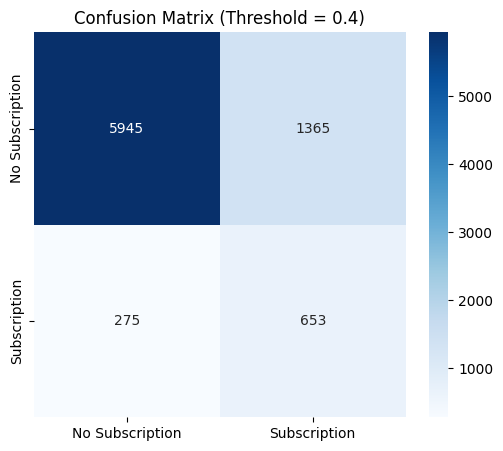


Threshold: 0.50
-----------------
Success Rate: 63.47%
Efficiency Rate: 43.25%
F1 Score: 0.514


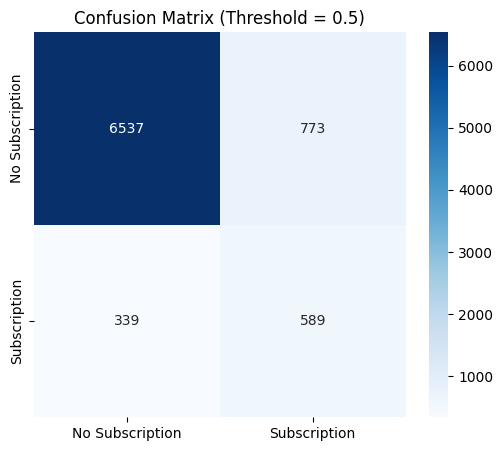


Threshold: 0.60
-----------------
Success Rate: 60.78%
Efficiency Rate: 46.92%
F1 Score: 0.530


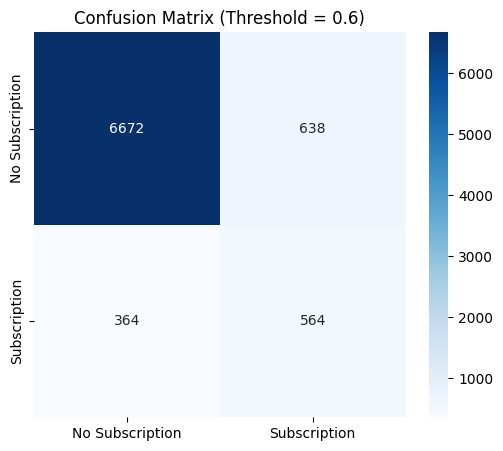

In [19]:
# After running previous evaluation code...
print("\nThreshold Analysis for RF Model:")
print("--------------------------------")
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Get probability predictions once
rf_proba = models_tuned['RF (tuned)'].predict_proba(X_test)[:, 1]

for threshold in thresholds:
    # Make predictions with current threshold
    y_pred_adjusted = (rf_proba >= threshold).astype(int)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred_adjusted)
    tn, fp, fn, tp = cm.ravel()
    success_rate = tp/(tp+fn)  # Recall
    efficiency_rate = tp/(tp+fp)  # Precision
    f1 = f1_score(y_test, y_pred_adjusted)
    
    print(f"\nThreshold: {threshold:.2f}")
    print("-----------------")
    print(f"Success Rate: {success_rate:.2%}")
    print(f"Efficiency Rate: {efficiency_rate:.2%}")
    print(f"F1 Score: {f1:.3f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Subscription', 'Subscription'],
                yticklabels=['No Subscription', 'Subscription'])
    plt.title(f'Confusion Matrix (Threshold = {threshold})')
    plt.show()

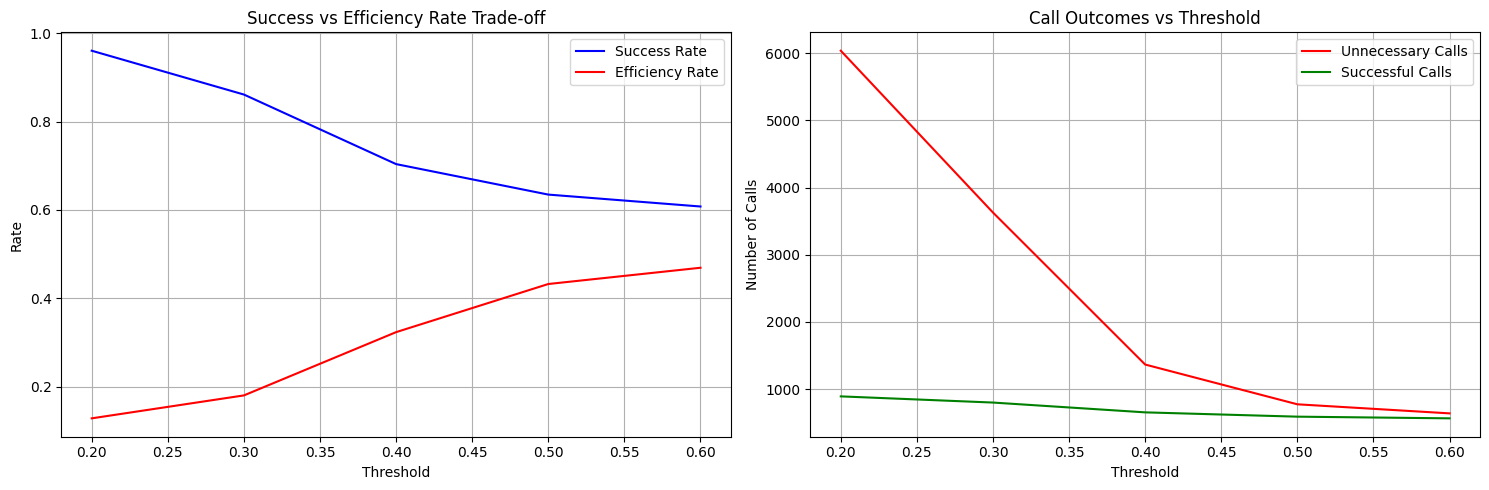

In [20]:
# Visualize the trade-offs
thresholds_metrics = {t: {
    'Success Rate': tp/(tp+fn),
    'Efficiency Rate': tp/(tp+fp),
    'Unnecessary Calls': fp,
    'Missed Opportunities': fn,
    'Total Calls': fp + tp,
    'Successful Calls': tp
} for t in thresholds 
    for tn, fp, fn, tp in [confusion_matrix(y_test, (rf_proba >= t).astype(int)).ravel()]}

# Plot trade-off curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Rates vs Threshold
ax1.plot([t for t in thresholds], 
         [thresholds_metrics[t]['Success Rate'] for t in thresholds], 
         'b-', label='Success Rate')
ax1.plot([t for t in thresholds], 
         [thresholds_metrics[t]['Efficiency Rate'] for t in thresholds], 
         'r-', label='Efficiency Rate')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Rate')
ax1.set_title('Success vs Efficiency Rate Trade-off')
ax1.grid(True)
ax1.legend()

# Calls vs Threshold
ax2.plot([t for t in thresholds], 
         [thresholds_metrics[t]['Unnecessary Calls'] for t in thresholds], 
         'r-', label='Unnecessary Calls')
ax2.plot([t for t in thresholds], 
         [thresholds_metrics[t]['Successful Calls'] for t in thresholds], 
         'g-', label='Successful Calls')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Number of Calls')
ax2.set_title('Call Outcomes vs Threshold')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## Threshold Optimization Analysis

### Performance Across Thresholds (RF Model)
| Threshold | Success Rate | Efficiency Rate | F1 Score | Total Calls | Successful Calls |
|-----------|--------------|-----------------|----------|-------------|------------------|
| 0.20      | 96.01%      | 12.86%         | 0.227    | 6928        | 891             |
| 0.30      | 86.10%      | 18.05%         | 0.298    | 4427        | 799             |
| 0.40      | 70.37%      | 32.36%         | 0.443    | 2018        | 653             |
| 0.50      | 63.47%      | 43.25%         | 0.514    | 1362        | 589             |
| 0.60      | 60.78%      | 46.92%         | 0.530    | 1202        | 564             |

### Trade-off Analysis
1. **Conservative Approach (Threshold = 0.60)**:
   - Highest efficiency (46.92%)
   - Best F1 score (0.530)
   - Fewest unnecessary calls (638)
   - But misses ~40% of potential subscribers

2. **Balanced Approach (Threshold = 0.40)**:
   - Good balance of metrics
   - Catches 70.37% of opportunities
   - Reasonable efficiency (32.36%)
   - Moderate number of calls (2018)

3. **Aggressive Approach (Threshold = 0.30)**:
   - Catches 86.10% of opportunities
   - Lower efficiency (18.05%)
   - Higher resource requirement (4427 calls)

### Final Recommendation
Based on the threshold analysis, we recommend:

1. **Initial Phase - Threshold = 0.40**:
   - Start with balanced approach
   - ~70% success rate with manageable call volume
   - Monitor resource utilization and conversion rates

2. **Adjustment Strategy**:
   - If resources allow and missed opportunities are costly: 
     * Consider lowering threshold to 0.30
   - If efficiency is crucial:
     * Consider raising threshold to 0.50

The visualization shows that 0.40 represents an inflection point where:
- Success rate decline starts to steepen
- Efficiency rate improvement starts to flatten
- Total calls become more manageable

This threshold provides a good starting point with room for adjustment based on business feedback and resource constraints.

In [24]:
def decile_analysis(y_true, y_pred_proba):
    # Create dataframe with actual and predicted
    df = pd.DataFrame({
        'actual': y_true,
        'predicted_prob': y_pred_proba
    })
    
    # Add decile rank (1 = highest probability)
    df['decile'] = pd.qcut(df['predicted_prob'], q=10, labels=range(10, 0, -1))
    
    # Calculate metrics by decile
    decile_stats = df.groupby('decile').agg({
        'actual': ['count', 'sum', 'mean'],
        'predicted_prob': ['min', 'max']
    })
    
    # Rename columns for clarity
    decile_stats.columns = ['Total_Count', 'Number_Success', 'Success_Rate', 'Min_Prob', 'Max_Prob']
    
    # Calculate cumulative metrics
    decile_stats['Cumulative_Success_Rate'] = (
        df.groupby('decile')['actual'].mean().cumsum() / 
        np.arange(1, 11)
    )
    
    # Calculate capture rate
    total_success = df['actual'].sum()
    decile_stats['Percent_of_Total_Success'] = (
        decile_stats['Number_Success'] / total_success * 100
    )
    
    # Round numeric columns
    decile_stats = decile_stats.round({
        'Success_Rate': 3,
        'Min_Prob': 3,
        'Max_Prob': 3,
        'Cumulative_Success_Rate': 3,
        'Percent_of_Total_Success': 1
    })
    
    return decile_stats

# Run analysis
decile_stats = decile_analysis(y_test, models_tuned['RF (tuned)'].predict_proba(X_test)[:, 1])

# Display results
print("Decile Analysis Results:")
print("------------------------")
print("\nHigher deciles should show higher success rates")
print("Decile 1 represents top 10% of predicted probabilities\n")
print(decile_stats)

Decile Analysis Results:
------------------------

Higher deciles should show higher success rates
Decile 1 represents top 10% of predicted probabilities

        Total_Count  Number_Success  Success_Rate  Min_Prob  Max_Prob  \
decile                                                                  
10              824              29         0.035     0.115     0.179   
9               824              20         0.024     0.179     0.214   
8               824              33         0.040     0.214     0.252   
7               823              30         0.036     0.252     0.284   
6               824              29         0.035     0.284     0.309   
5               824              54         0.066     0.309     0.334   
4               823              45         0.055     0.334     0.366   
3               824              71         0.086     0.366     0.443   
2               824             167         0.203     0.443     0.741   
1               824             450       

C:\Users\ROnik\AppData\Local\Temp\ipykernel_31040\2800037683.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_stats = df.groupby('decile').agg({
C:\Users\ROnik\AppData\Local\Temp\ipykernel_31040\2800037683.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('decile')['actual'].mean().cumsum() /


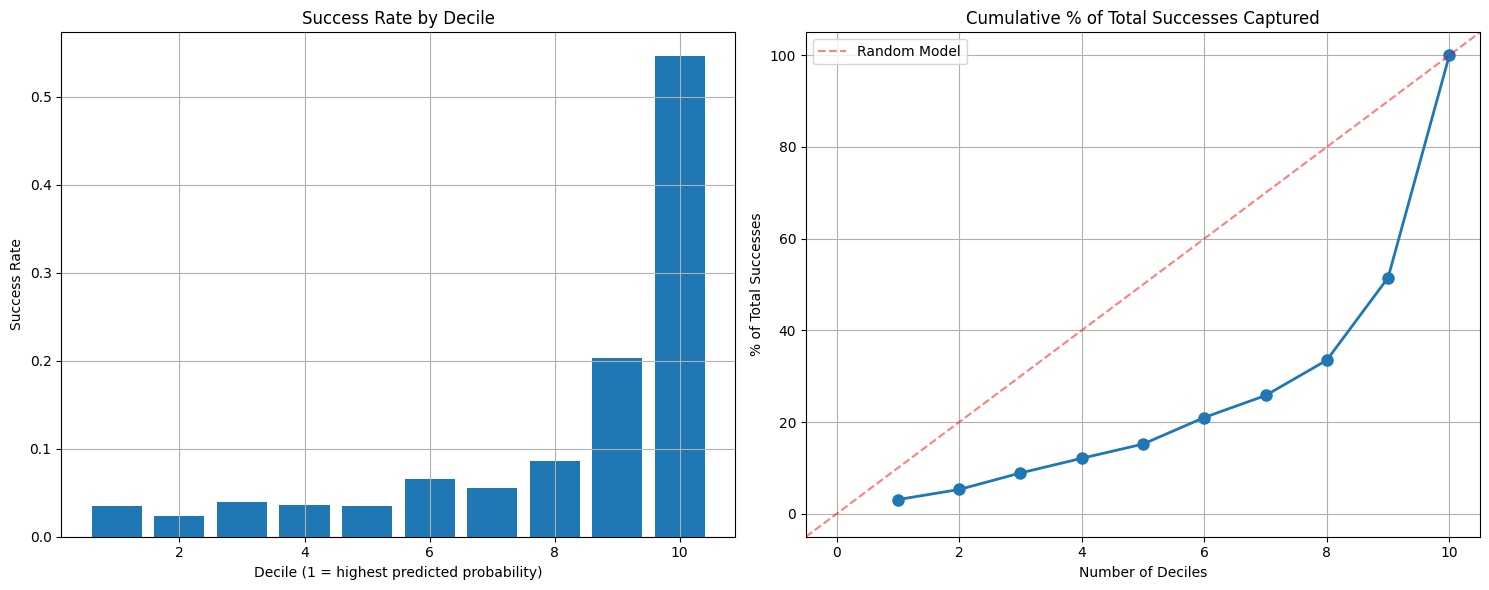

In [26]:
# Create two-panel visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Success Rate by Decile
ax1.bar(range(1, 11), decile_stats['Success_Rate'])
ax1.set_title('Success Rate by Decile')
ax1.set_xlabel('Decile (1 = highest predicted probability)')
ax1.set_ylabel('Success Rate')
ax1.grid(True)

# Cumulative Capture Rate
ax2.plot(range(1, 11), decile_stats['Percent_of_Total_Success'].cumsum(), 
         marker='o', linewidth=2, markersize=8)
ax2.set_title('Cumulative % of Total Successes Captured')
ax2.set_xlabel('Number of Deciles')
ax2.set_ylabel('% of Total Successes')
ax2.grid(True)
ax2.axline([0, 0], [10, 100], color='r', linestyle='--', alpha=0.5, 
           label='Random Model')
ax2.legend()

plt.tight_layout()
plt.show()

## Decile Analysis Results

### Plot Interpretation
1. **Success Rate by Decile**
   - Shows dramatic difference between top and bottom deciles
   - Decile 1 (top 10%) has 54.6% success rate
   - Decile 2 has 20.3% success rate
   - Remaining deciles show much lower rates (2.4-8.6%)

2. **Cumulative Success Capture**
   - Top 20% of predictions capture 66.5% of successes (48.5% + 18.0%)
   - Model significantly outperforms random selection (shown by red dashed line)
   - Strong concentration of successes in top deciles indicates good discriminative power

### Business Value
1. **Resource Optimization**
   - Top decile yields 54.6% conversion rate vs 11.3% overall average
   - Focusing on top 20% of prospects would capture 2/3 of potential subscribers
   - Clear prioritization guidance for call center resources

2. **Cost-Benefit Implications**
   - Very high return potential in top two deciles
   - Sharp drop-off after second decile suggests natural cutoff point
   - Aligns with threshold analysis findings (threshold 0.40-0.50 range)

### Integration with Threshold Analysis
This decile analysis reinforces our threshold optimization findings:
- High-threshold approach (0.60) aligns with top decile performance
- Balanced threshold (0.40) captures high-performing top 3 deciles
- Probability ranges:
  * Top decile: 0.742-0.984
  * Second decile: 0.443-0.741
  * Matches our recommended threshold range

### Recommendation
1. **Two-Tier Approach**:
   - Priority Tier: Focus on top 2 deciles (probability > 0.443)
     * Expected success rate: 20-55%
     * Captures 66.5% of potential subscribers
   - Secondary Tier: Include 3rd decile when resources allow
     * Additional 7.7% of successes
     * Minimum probability threshold: 0.366

2. **Resource Planning**:
   - Assign best agents to top decile prospects
   - Plan capacity based on ~1,650 high-priority contacts (top 2 deciles)
   - Expect ~617 successful conversions from these contacts

## Conclusion

This project demonstrates the development of a machine learning solution for bank marketing optimization using the UCI Bank Marketing dataset. The analysis showcases:

### Technical Implementation
1. **Model Development & Selection**
   - Systematic comparison of Random Forest and XGBoost
   - Comprehensive evaluation metrics (ROC-AUC: 0.815)
   - Threshold optimization for business flexibility

2. **Feature Engineering & Analysis**
   - Cyclical encoding for temporal features
   - Handling of categorical variables
   - Clear identification of key predictors

3. **Business-Focused Evaluation**
   - Translation of technical metrics to business outcomes
   - Cost-benefit analysis of different thresholds
   - Actionable insights from feature importance

### Skills Demonstrated
1. **Data Science Competencies**
   - Machine learning model development
   - Feature engineering and selection
   - Model evaluation and optimization

2. **Business Acumen**
   - Metric selection for business relevance
   - Trade-off analysis
   - Clear communication of technical results

3. **Problem-Solving Approach**
   - Systematic evaluation methodology
   - Focus on interpretable results
   - Balance of technical and business considerations

This project illustrates the application of machine learning techniques to real-world business problems, with particular emphasis on practical implementation and business value assessment.

## Data Export for Visualization
The following code saves key datasets for Power BI visualization:
- Preprocessed data with engineered features
- Model predictions and probability scores
- Feature importance rankings
- Business performance metrics

Note: This section is for data export only and can be skipped when reviewing the analysis.

In [55]:
# Save preprocessed dataset
df_processed = X.copy()
df_processed['y'] = y  # Add target variable back for analysis
df_processed.to_csv("bank_marketing_processed.csv", index=False)

In [56]:
# Save model predictions for Power BI
df_predictions = X_test.copy()
df_predictions['actual'] = y_test
df_predictions['rf_pred'] = models_tuned['RF (tuned)'].predict(X_test)
df_predictions['rf_proba'] = models_tuned['RF (tuned)'].predict_proba(X_test)[:, 1]
df_predictions['xgb_pred'] = models_tuned['XGB (tuned)'].predict(X_test)
df_predictions['xgb_proba'] = models_tuned['XGB (tuned)'].predict_proba(X_test)[:, 1]

In [57]:
# Look at unique values and their counts
print("Unique values in emp.var.rate:")
print(df_processed['emp.var.rate'].value_counts().sort_index())

Unique values in emp.var.rate:
emp.var.rate
-3.4     1071
-3.0      172
-2.9     1663
-1.8     9184
-1.7      773
-1.1      635
-0.2       10
-0.1     3683
 1.1     7763
 1.4    16234
Name: count, dtype: int64


In [ ]:
# Add economic indicator bins for segmentation 
# Using quantiles for equal-sized groups, though bins could be adjusted based on domain expertise
# For emp.var.rate, use custom bins based on data distribution
df_processed['emp.var.rate_bin'] = pd.cut(
    df_processed['emp.var.rate'],
    bins=[-float('inf'), -2.0, -1.0, 0, float('inf')],
    labels=['Severe Decline', 'Moderate Decline', 'Mild Decline', 'Growth']
)

# For other economic features, continue with quintiles
other_features = ['cons.price.idx', 'cons.conf.idx', 'euribor3m']
for col in other_features:
    df_processed[f'{col}_bin'] = pd.qcut(
        df_processed[col],
        q=5,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
        duplicates='drop'
    )

In [59]:
# Add decile information to predictions
df_predictions['rf_decile'] = pd.qcut(df_predictions['rf_proba'], q=10, labels=range(10, 0, -1))
df_predictions['xgb_decile'] = pd.qcut(df_predictions['xgb_proba'], q=10, labels=range(10, 0, -1))

# Add threshold-based predictions for different thresholds
thresholds = [0.3, 0.4, 0.5]
for t in thresholds:
    df_predictions[f'rf_pred_{int(t*100)}'] = (df_predictions['rf_proba'] >= t).astype(int)
    df_predictions[f'xgb_pred_{int(t*100)}'] = (df_predictions['xgb_proba'] >= t).astype(int)

# Save updated files
df_processed.to_csv("bank_marketing_processed.csv", index=False)
df_predictions.to_csv("bank_marketing_predictions.csv", index=False)

#Create feature importance dataset
feature_imp_data = {
    'Feature': feature_names,
    'Importance': models_tuned['RF (tuned)'].feature_importances_
}
df_feature_importance = pd.DataFrame(feature_imp_data)
df_feature_importance.to_csv("bank_marketing_feature_importance.csv", index=False)

In [ ]:
# Business impact summary
metrics_data = {
    'Metric': ['Success Rate', 'Efficiency Rate', 'Missed Opportunities', 'Unnecessary Calls'],
    'Random Forest': [0.6347, 0.4325, 339, 773],
    'XGBoost': [0.6595, 0.3797, 316, 1000]
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics.to_csv("bank_marketing_metrics.csv", index=False)